In [78]:
import tensorflow as tf
tf.__version__
import tensorflow_addons as tfa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from os import path, listdir
import seaborn as sns

In [44]:
IMAGE_SHAPE = (224,224)

## Preprocessing

In [14]:
train_path = 'dataset/train'
test_path = 'dataset/test'
print(train_path)
print(test_path)

dataset/train
dataset/test


In [57]:
image_dir = path.join(train_path + '/Erick_Gozali')
images = listdir(image_dir)
images_path = [path.join(image_dir,image[i]) for i in range(len(images))]

In [65]:
images_array = [imread(img) for img in images_path]

In [73]:
widths = []
heights = []
colors = []
    
for img in images_array:    
    w, h, c = img.shape
    widths.append(w)
    heights.append(h)
    colors.append(c)

(array([  0.,   0.,   0.,   0.,   0., 125.,   0.,   0.,   0.,   0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5]),
 <a list of 10 Patch objects>)

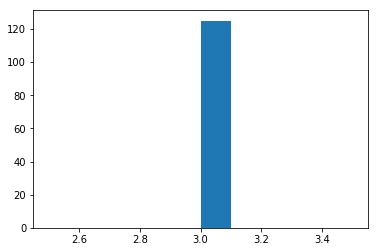

In [87]:
plt.hist(colors)

In [127]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(shear_range=0.1,
                               fill_mode='nearest',
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               rotation_range=30,
                               horizontal_flip=True,
                               rescale=1./255,)

In [128]:
train_dataset = image_gen.flow_from_directory(train_path,
                                              batch_size=32,
                                              class_mode='sparse',
                                              color_mode='rgb',
                                              shuffle=True,
                                              target_size=IMAGE_SHAPE)

Found 250 images belonging to 2 classes.


In [129]:
print('classes: {}'.format(train_dataset.class_indices))

classes: {'Daniel_Chrisna_Danuega': 0, 'Erick_Gozali': 1}


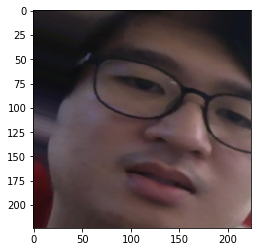

In [130]:
plt.imshow(train_dataset[0][0][2])

## Model

In [137]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Lambda
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [136]:
model = Sequential()

model.add(Conv2D(filters=256, kernel_size=(4,4), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(4,4), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(4,4), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(4,4), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation=None))
model.add(Lambda(lambda x: tf.math.l2_normalize(x, axis=1)))

In [138]:
early_stop = EarlyStopping(monitor='loss', patience=3)

In [139]:
model.compile(loss=tfa.losses.triplet_semihard_loss, 
              optimizer='adam')

In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 221, 221, 256)     12544     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 256)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 256)     1048832   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 256)       1048832   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 256)       1048832   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 44, 44, 256)       1

In [142]:
model.fit(train_dataset, epochs=5)

Epoch 1/5


ResourceExhaustedError:  OOM when allocating tensor with shape[32,44,44,256] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential/conv2d_4/Relu (defined at <ipython-input-142-d42e823ed7d1>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_1519]

Function call stack:
train_function
